# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 627


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
url = "https://api.openweathermap.org/data/2.5/weather?"   #lat={lat}&lon={lon}&appid={API key}"
unit = 'imperial'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# loop to fetch weather data
for i, city in enumerate(cities[0:50]):

    # cities group into sets of 50 for logging purposes
    if ( i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    
    #create main url for city
    city_url = f"{url}appid={weather_api_key}&unit={unit}&q={city}"

    #print statement to log the url, record and set numbers
    print(" Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    #update record count
    record_count += 1



    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

            # Step 2:
        response = requests.get(city_url)
        
         # Step 3: 
        status_code = response.status_code
        
        # Step 4: 
        if status_code == 200:
            city_weather = response.json()
        else:
            city_weather = {} # failed request
            
        #data extraction
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather.get("coord", {}).get("lat")
        city_lng = city_weather.get("coord", {}).get("lon")
        city_max_temp = city_weather.get("main", {}).get("temp_max")
        city_humidity = city_weather.get("main", {}).get("humidity")
        city_clouds = city_weather.get("clouds", {}).get("all")
        city_wind = city_weather.get("wind", {}).get("speed")
        city_country = city_weather.get("sys", {}).get("country")
        city_date = city_weather.get("dt")

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        print(e)
        pass

    #sleep for 1 second
    time.sleep(1)
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
 Processing Record 1 of Set 1 | edinburgh of the seven seas
 Processing Record 2 of Set 1 | sirte
 Processing Record 3 of Set 1 | west island
 Processing Record 4 of Set 1 | port mathurin
 Processing Record 5 of Set 1 | seybaplaya
 Processing Record 6 of Set 1 | paracale
 Processing Record 7 of Set 1 | college
 Processing Record 8 of Set 1 | olonkinbyen
 Processing Record 9 of Set 1 | fuvahmulah
 Processing Record 10 of Set 1 | port-aux-francais
 Processing Record 11 of Set 1 | saipan
 Processing Record 12 of Set 1 | puerto ayora
 Processing Record 13 of Set 1 | san patricio
 Processing Record 14 of Set 1 | al kharijah
 Processing Record 15 of Set 1 | remire-montjoly
 Processing Record 16 of Set 1 | uturoa
 Processing Record 17 of Set 1 | coquimbo
 Processing Record 18 of Set 1 | qaqortoq
 Processing Record 19 of Set 1 | bom jesus
 Processing Record 20 of Set 1 | waitangi
 Processing Record 21 of Set 1 | enewetak
 Processing R

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          50
Lat           47
Lng           47
Max Temp      47
Humidity      47
Cloudiness    47
Wind Speed    47
Country       47
Date          47
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,289.52,94.0,73.0,8.31,SH,1.717252e+09
1,sirte,31.2089,16.5887,308.62,27.0,100.0,6.60,LY,1.717252e+09
2,west island,-12.1568,96.8225,300.14,89.0,100.0,7.20,CC,1.717252e+09
3,port mathurin,-19.6833,63.4167,298.01,67.0,2.0,10.02,MU,1.717252e+09
4,seybaplaya,19.6500,-90.6667,302.85,64.0,5.0,4.51,MX,1.717252e+09


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities_output.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities_output.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,289.52,94.0,73.0,8.31,SH,1.717252e+09
1,sirte,31.2089,16.5887,308.62,27.0,100.0,6.60,LY,1.717252e+09
2,west island,-12.1568,96.8225,300.14,89.0,100.0,7.20,CC,1.717252e+09
3,port mathurin,-19.6833,63.4167,298.01,67.0,2.0,10.02,MU,1.717252e+09
4,seybaplaya,19.6500,-90.6667,302.85,64.0,5.0,4.51,MX,1.717252e+09


In [12]:
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        50 non-null     object 
 1   Lat         47 non-null     float64
 2   Lng         47 non-null     float64
 3   Max Temp    47 non-null     float64
 4   Humidity    47 non-null     float64
 5   Cloudiness  47 non-null     float64
 6   Wind Speed  47 non-null     float64
 7   Country     47 non-null     object 
 8   Date        47 non-null     float64
dtypes: float64(7), object(2)
memory usage: 3.9+ KB


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

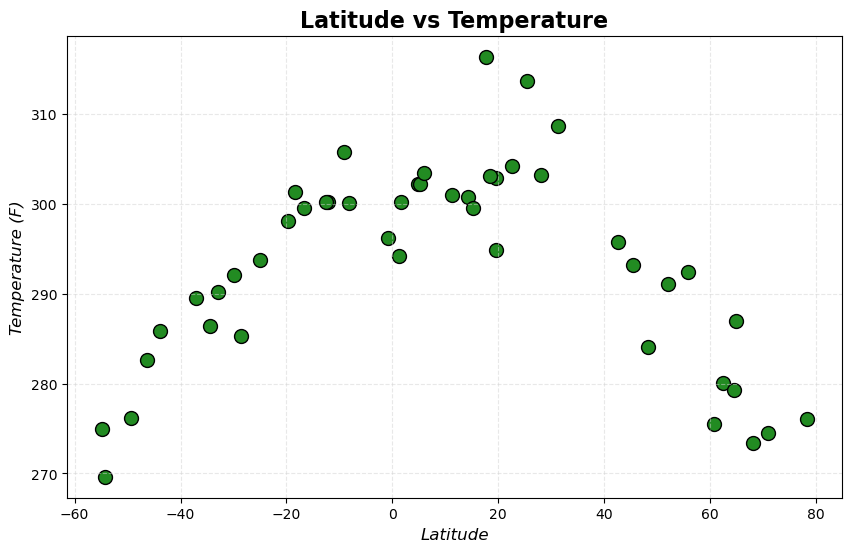

In [17]:
# Build scatter plot for latitude vs. temperature
# Step 1: Get the Data
x = city_data_df.Lat         
y = city_data_df['Max Temp']

# Step 2: Make the canvas
plt.figure(figsize=(10, 6))

# Step 3: Make the basic plot
plt.scatter(x, y, facecolor="forestgreen", edgecolor="black", s=100)

# Step 4: Customizations
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Temperature (F)", fontsize=12, fontstyle="italic")
plt.title("Latitude vs Temperature", fontweight="bold", fontsize=16)

plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

# Save the figure
plt.savefig("../output_data/Fig1_LatVsTemp_sub.png")

# Step 5: Show/Save the graph
plt.show()

#### Latitude Vs. Humidity

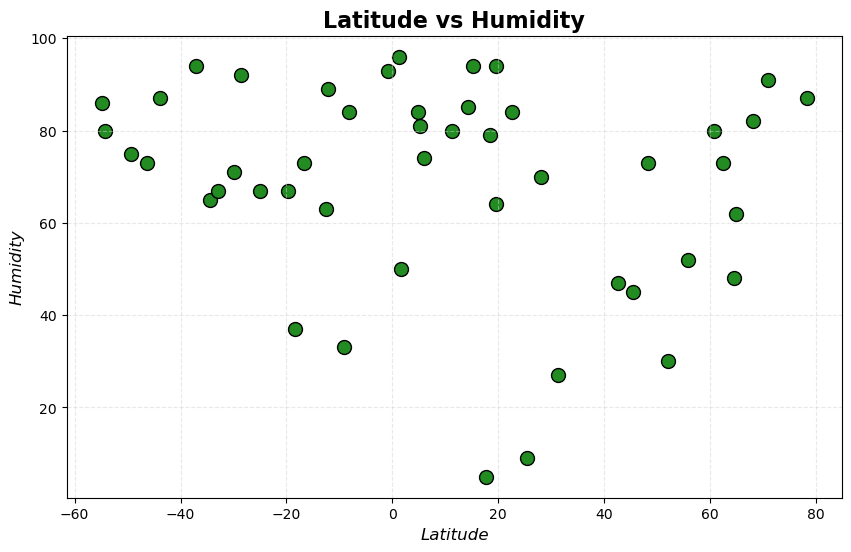

In [18]:
# Build scatter plot for latitude vs. humidity
# Step 1: Get the Data
x = city_data_df.Lat         
y = city_data_df.Humidity

# Step 2: Make the canvas
plt.figure(figsize=(10, 6))

# Step 3: Make the basic plot
plt.scatter(x, y, facecolor="forestgreen", edgecolor="black", s=100)

# Step 4: Customizations
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Humidity", fontsize=12, fontstyle="italic")
plt.title("Latitude vs Humidity", fontweight="bold", fontsize=16)

plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

# Save the figure
plt.savefig("../output_data/Fig1_LatVsHumid_sub.png")

# Step 5: Show/Save the graph
plt.show()

#### Latitude Vs. Cloudiness

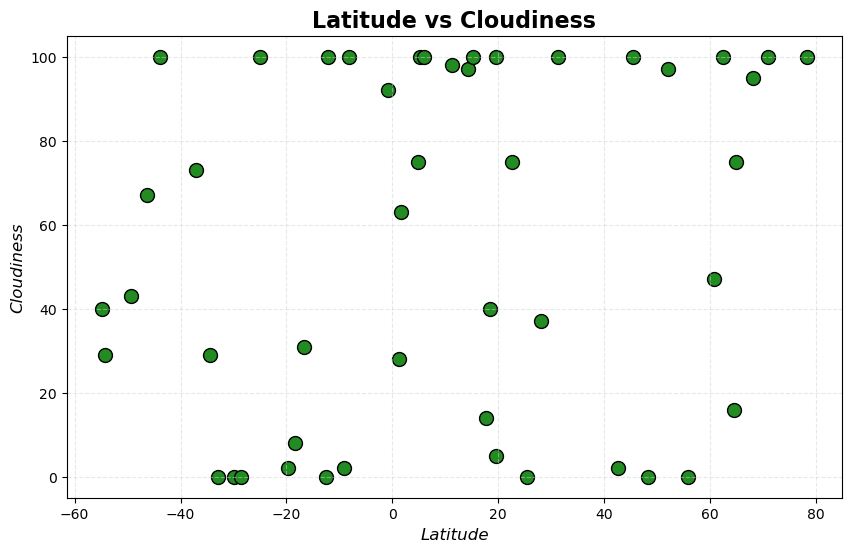

In [20]:
# Build scatter plot for latitude vs. cloudiness
# Step 1: Get the Data
x = city_data_df.Lat         
y = city_data_df.Cloudiness  

# Step 2: Make the canvas
plt.figure(figsize=(10, 6))

# Step 3: Make the basic plot
plt.scatter(x, y, facecolor="forestgreen", edgecolor="black", s=100)

# Step 4: Customizations
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Cloudiness", fontsize=12, fontstyle="italic")
plt.title("Latitude vs Cloudiness", fontweight="bold", fontsize=16)

plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

# Save the figure
plt.savefig("../output_data/Fig1_LatVsCloud_sub.png")

# Step 5: Show/Save the graph
plt.show()

#### Latitude vs. Wind Speed Plot

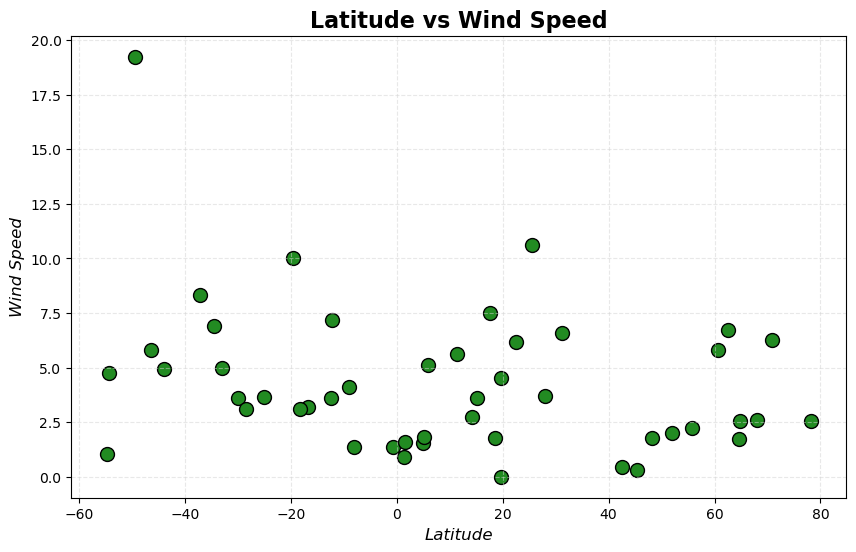

In [21]:
# Build scatter plot for latitude vs. wind speed
# Step 1: Get the Data
x = city_data_df.Lat         
y = city_data_df['Wind Speed']

# Step 2: Make the canvas
plt.figure(figsize=(10, 6))

# Step 3: Make the basic plot
plt.scatter(x, y, facecolor="forestgreen", edgecolor="black", s=100)

# Step 4: Customizations
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Wind Speed", fontsize=12, fontstyle="italic")
plt.title("Latitude vs Wind Speed", fontweight="bold", fontsize=16)

plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

# Save the figure
plt.savefig("../output_data/Fig1_LatVsWind_sub.png")

# Step 5: Show/Save the graph
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [22]:
# Define a function to create Linear Regression plots

def Regression(x_values, y_value, xtitle, ytitle, annotation_pos):
    
    # makes the line of best fit
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept # calculate the predictions
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # make the plot
    # Step 2: Make the canvas
    plt.figure(figsize=(10, 6))
    
    # Step 3: Make the basic plot
    plt.scatter(x_values, y_values, facecolor="forestgreen", edgecolor="black", s=100)
    plt.plot(x_values, regress_values, "r-") # plot the line of best fit
    
    # Step 4: Customizations
    plt.xlabel(xtitle, fontsize=12, fontstyle="italic")
    plt.ylabel(ytitle, fontsize=12, fontstyle="italic")
    plt.title(f"{xtitle} vs {ytitle}", fontweight="bold", fontsize=16)
    plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)
    
    plt.annotate(line_eq, annotation_pos, fontsize=15, color="red")
    
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [24]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northhem_df = city_data_df.loc[city_data_df.Lat >= 0 ]

# Display sample data
northhem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,sirte,31.2089,16.5887,308.62,27.0,100.0,6.60,LY,1.717252e+09
4,seybaplaya,19.6500,-90.6667,302.85,64.0,5.0,4.51,MX,1.717252e+09
5,paracale,14.2804,122.7881,300.74,85.0,97.0,2.72,PH,1.717252e+09
6,college,64.8569,-147.8028,286.93,62.0,75.0,2.57,US,1.717252e+09
7,olonkinbyen,70.9221,-8.7187,274.55,91.0,100.0,6.28,SJ,1.717252e+09


In [25]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southhem_df = city_data_df.loc[city_data_df.Lat < 0 ]

# Display sample data
southhem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,289.52,94.0,73.0,8.31,SH,1.717252e+09
2,west island,-12.1568,96.8225,300.14,89.0,100.0,7.20,CC,1.717252e+09
3,port mathurin,-19.6833,63.4167,298.01,67.0,2.0,10.02,MU,1.717252e+09
9,port-aux-francais,-49.3500,70.2167,276.21,75.0,43.0,19.24,TF,1.717252e+09
11,puerto ayora,-0.7393,-90.3518,296.13,93.0,92.0,1.34,EC,1.717252e+09


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.6518865504927632


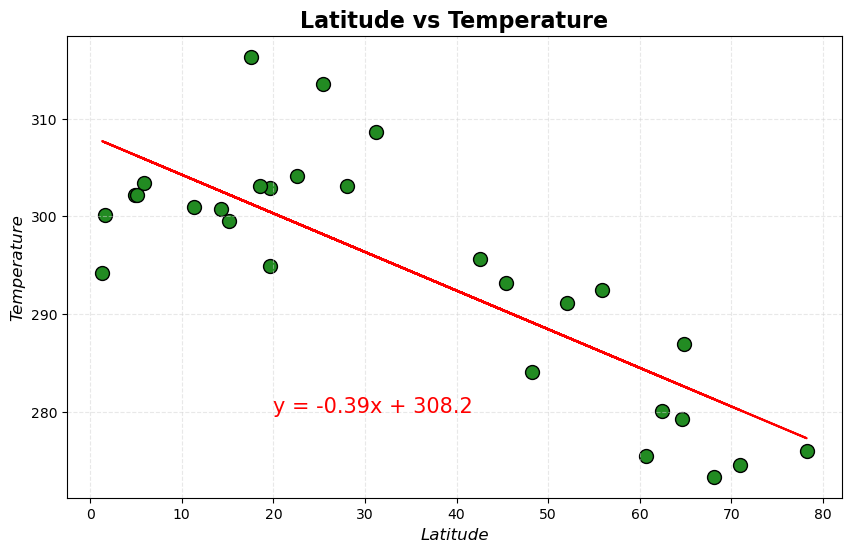

<Figure size 640x480 with 0 Axes>

In [56]:
# Linear regression on Northern Hemisphere
x_values = northhem_df.Lat
y_values = northhem_df['Max Temp']
Regression(x_values, y_values, "Latitude", "Temperature", (20,280))

# Save the figure
plt.savefig("../output_data/NorthLatVsTemp_Reg_sub.png")

The r-squared is: 0.8444781219903174


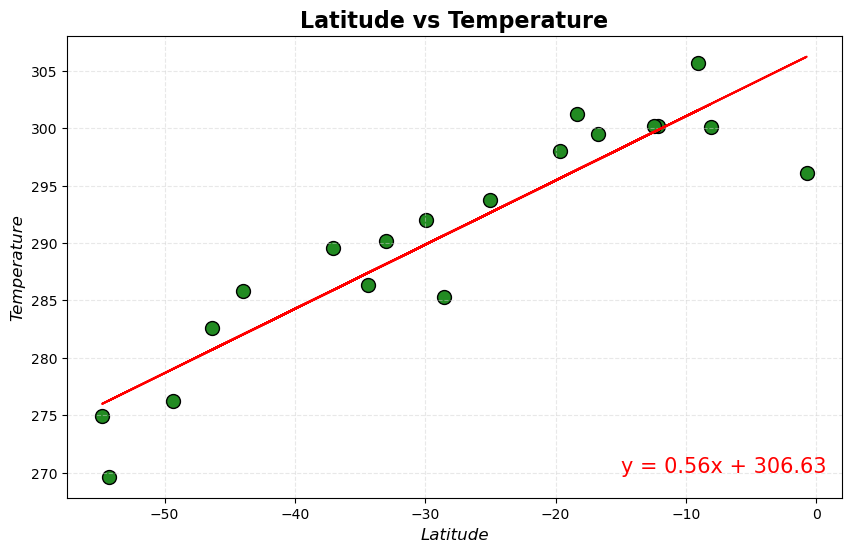

<Figure size 640x480 with 0 Axes>

In [57]:
# Linear regression on Southern Hemisphere
x_values = southhem_df.Lat
y_values = southhem_df['Max Temp']
Regression(x_values, y_values, "Latitude", "Temperature", (-15,270))

# Save the figure
plt.savefig("../output_data/SouthLatVsTemp_Reg_sub.png")

**Discussion about the linear relationship:** There does appear to be a relationship between Latitude and Temperature, with there being a stronger relationship in southern hemisphere cities compared to northern. Though this could be a variation caused by the same that the data is taken from. 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.00386237674834758


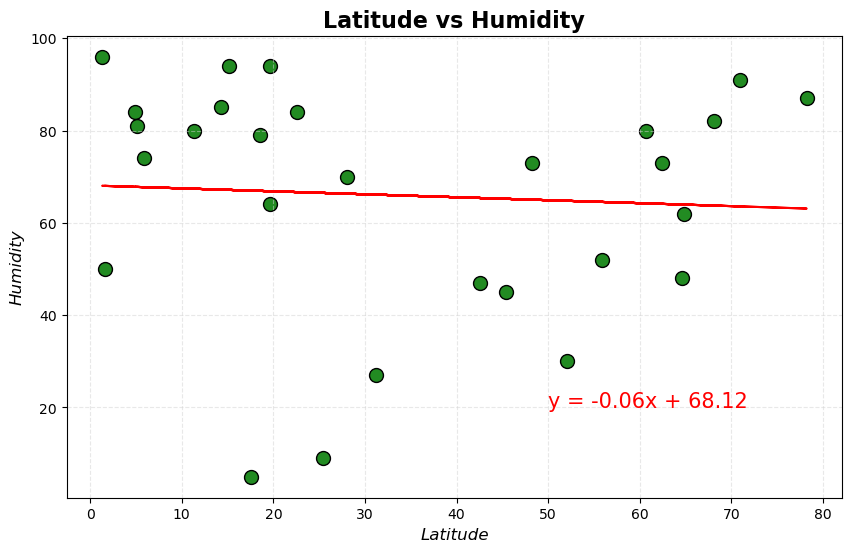

<Figure size 640x480 with 0 Axes>

In [58]:
# Northern Hemisphere
x_values = northhem_df.Lat
y_values = northhem_df.Humidity
Regression(x_values, y_values, "Latitude", "Humidity", (50,20))

# Save the figure
plt.savefig("../output_data/NorthLatVsHumid_Reg_sub.png")

The r-squared is: 0.05915440013169634


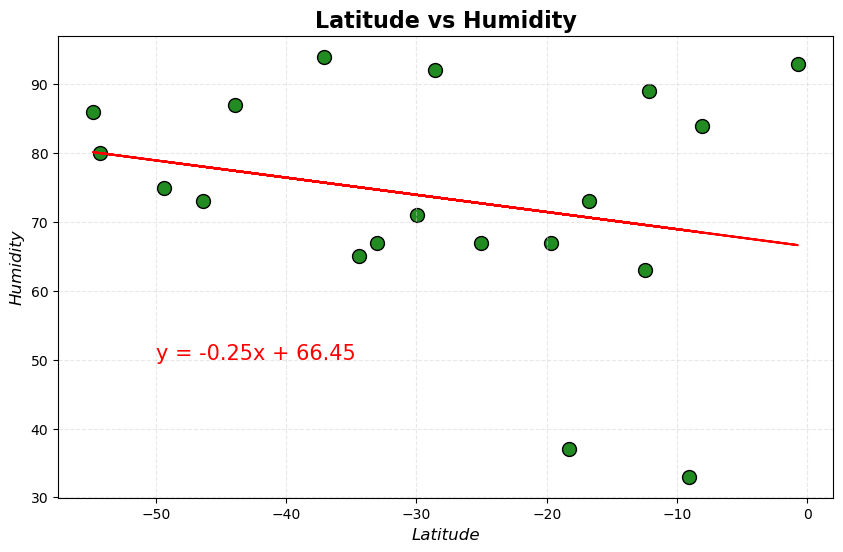

<Figure size 640x480 with 0 Axes>

In [59]:
# Southern Hemisphere
x_values = southhem_df.Lat
y_values = southhem_df.Humidity
Regression(x_values, y_values, "Latitude", "Humidity", (-50,50))

# Save the figure
plt.savefig("../output_data/SouthLatVsHumid_Reg_sub.png")

**Discussion about the linear relationship:** There does not appear to be a noteworthy relationship between Latitude and Humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.0001524164539440625


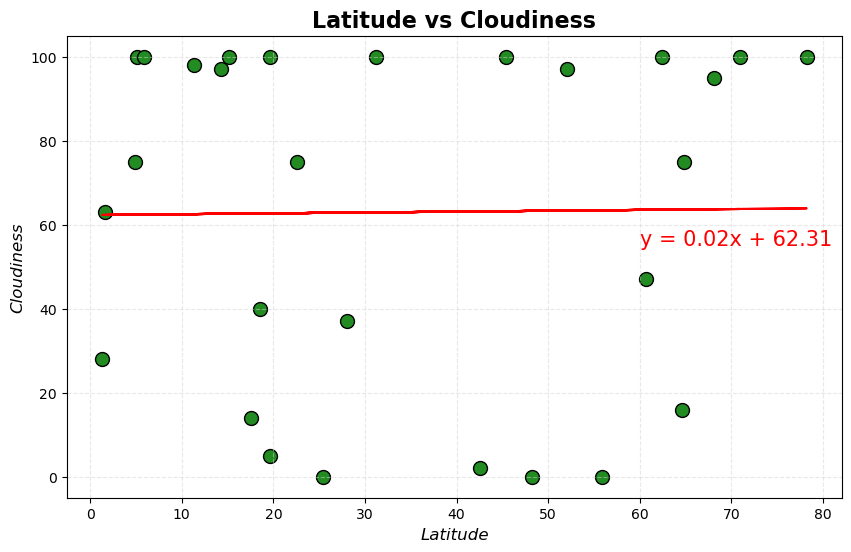

<Figure size 640x480 with 0 Axes>

In [60]:
# Northern Hemisphere
x_values = northhem_df.Lat
y_values = northhem_df.Cloudiness
Regression(x_values, y_values, "Latitude", "Cloudiness", (60,55))

# Save the figure
plt.savefig("../output_data/NorthLatVsCloud_Reg_sub.png")

The r-squared is: 0.0018763255463462413


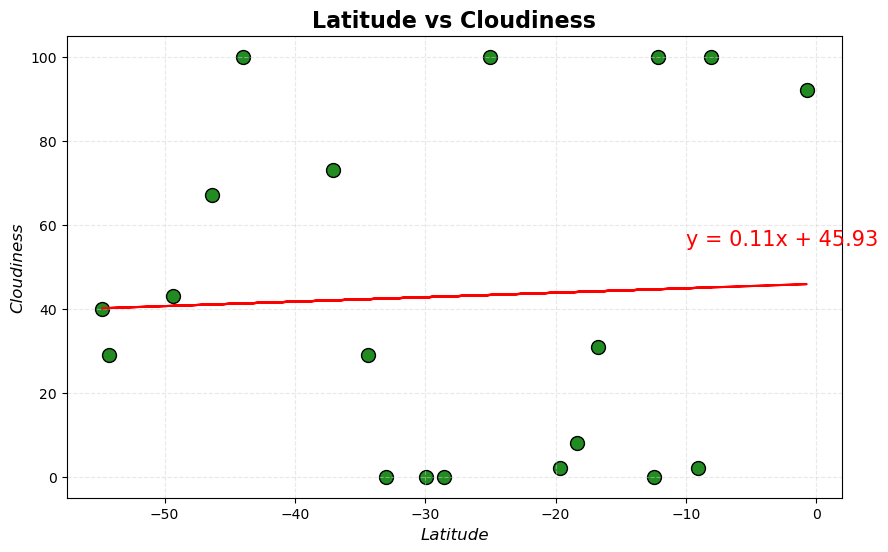

<Figure size 640x480 with 0 Axes>

In [61]:
# Southern Hemisphere
x_values = southhem_df.Lat
y_values = southhem_df.Cloudiness
Regression(x_values, y_values, "Latitude", "Cloudiness", (-10,55))\

# Save the figure
plt.savefig("../output_data/SouthLatVsCloud_Reg_sub.png")

**Discussion about the linear relationship:** There does not appear to be a strong relationship between Latitude and Cloudiness. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0002551269680508141


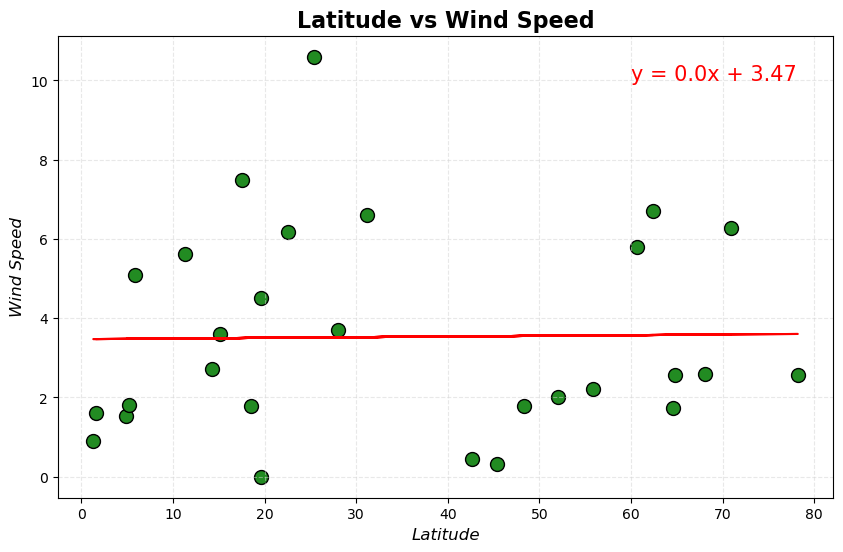

<Figure size 640x480 with 0 Axes>

In [62]:
# Northern Hemisphere
x_values = northhem_df.Lat
y_values = northhem_df['Wind Speed']
Regression(x_values, y_values, "Latitude", "Wind Speed", (60,10))

# Save the figure
plt.savefig("../output_data/NorthLatVsWind_Reg_sub.png")

The r-squared is: 0.11698731489848471


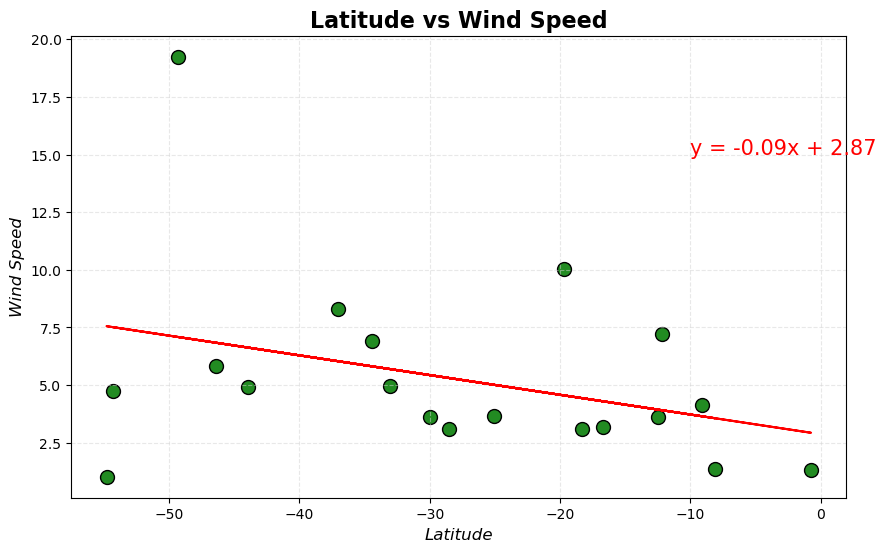

<Figure size 640x480 with 0 Axes>

In [63]:
# Southern Hemisphere
x_values = southhem_df.Lat
y_values = southhem_df['Wind Speed']
Regression(x_values, y_values, "Latitude", "Wind Speed", (-10,15))

# Save the figure
plt.savefig("../output_data/SouthLatVsWind_Reg_sub.png")

**Discussion about the linear relationship:** There does not appaer to be a strong relationship for Latitude vs Wind speed in the Northern hemisphere. There is a slightly stronger relationship in the southern hemisphere, but it is still not strong enough to draw any relevant conclusions from. 